In [19]:
import os
import sys
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report

# grab the data

data = pd.read_csv('dataset.csv')
jp = pd.read_csv('data_jp_legit.csv')
njp = pd.read_csv('data_njp.csv')

In [56]:
y = njp[['is_diterima']]
X = njp.drop(['is_diterima'], axis=1)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

## Render out the decision path somehow

In [15]:
test = pd.DataFrame( {'lokasi':[5],
       'status':[1],
       'tipe':[1],
       'id_daftar_sekolah':[8],
       'id_prodi_pilihan_1':[9],
       'id_prodi_pilihan_2':[10],
        'nilai_tpa_verbal':[20],
        'nilai_tpa_spasial':[20],
        'nilai_tpa_analogi':[20],
        'nilai_tpa_numerik':[20]
       })

result = rfc.predict(test)[0]

print(result)

0


In [37]:
columns = list(test.columns.values)
estimator = rfc

n_nodes_ = [t.tree_.node_count for t in rfc.estimators_]
children_left_ = [t.tree_.children_left for t in rfc.estimators_]
children_right_ = [t.tree_.children_right for t in rfc.estimators_]
feature_ = [t.tree_.feature for t in rfc.estimators_]
threshold_ = [t.tree_.threshold for t in rfc.estimators_]

def explore_tree(rfc, n_nodes, children_left,children_right, feature,threshold,
                suffix='', print_tree= False, sample_id=0, feature_names=columns):

    node_indicator = rfc.decision_path(test)

    leave_id = rfc.apply(test)

    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]
    
    # print(test.iloc[sample_id,:])

    print('Rules used to predict test data: ')
    for node_id in node_index:
    
        tabulation = ""
        if leave_id[sample_id] == node_id:
            print("%s==> Predicted leaf index"%(tabulation))

        if (test.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("%s (= %s) %s %s)"
              % (columns[feature[node_id]],
                 test.iloc[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))
    print("\n%sPrediction for sample %d: %s"%(tabulation,
                                          sample_id,
                                          rfc.predict(test)[sample_id]))


In [38]:
for i,e in enumerate(rfc.estimators_):

    print("Tree %d\n"%i)
    explore_tree(rfc.estimators_[i],n_nodes_[i],children_left_[i],
                 children_right_[i], feature_[i],threshold_[i],
                suffix=i, sample_id=0, feature_names=["Feature_%d"%i for i in range(X.shape[1])])
    print('\n')

Tree 0

Rules used to predict test data: 
nilai_tpa_verbal (= 20) <= 55.0)
nilai_tpa_analogi (= 20) <= 25.0)
tipe (= 1) > 0.5)
id_daftar_sekolah (= 8) <= 570.0)
id_prodi_pilihan_2 (= 10) > 9.5)
status (= 1) > 0.5)
==> Predicted leaf index
nilai_tpa_analogi (= 20) > -2.0)

Prediction for sample 0: 1.0


Tree 1

Rules used to predict test data: 
id_daftar_sekolah (= 8) <= 2427.0)
id_prodi_pilihan_2 (= 10) > 9.5)
nilai_tpa_spasial (= 20) > 15.0)
nilai_tpa_numerik (= 20) <= 25.0)
id_daftar_sekolah (= 8) <= 1065.0)
nilai_tpa_verbal (= 20) <= 20.0)
nilai_tpa_analogi (= 20) <= 25.0)
id_daftar_sekolah (= 8) <= 165.0)
==> Predicted leaf index
nilai_tpa_analogi (= 20) > -2.0)

Prediction for sample 0: 0.0


Tree 2

Rules used to predict test data: 
id_prodi_pilihan_2 (= 10) > 9.5)
nilai_tpa_verbal (= 20) <= 75.0)
tipe (= 1) > 0.5)
id_daftar_sekolah (= 8) <= 1704.5)
nilai_tpa_verbal (= 20) <= 65.0)
id_daftar_sekolah (= 8) <= 1167.5)
==> Predicted leaf index
nilai_tpa_analogi (= 20) > -2.0)

Predi

E:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
E:\Anaconda\lib\site-package

## NOW with Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)

# fit the model
rfc.fit(X_train, y_train.values.ravel())

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with Random Forest Classifier: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Compare the train-set and test-set accuracy
y_pred_train = rfc.predict(X_train)

y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(rfc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rfc.score(X_test, y_test)))

# classification report

print(classification_report(y_test, y_pred))

Model accuracy score with Random Forest Classifier: 0.8113
Training-set accuracy score: 0.9788
Training set score: 0.9788
Test set score: 0.8113
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       188
           1       0.84      0.80      0.82       220

    accuracy                           0.81       408
   macro avg       0.81      0.81      0.81       408
weighted avg       0.81      0.81      0.81       408



<BarContainer object of 10 artists>

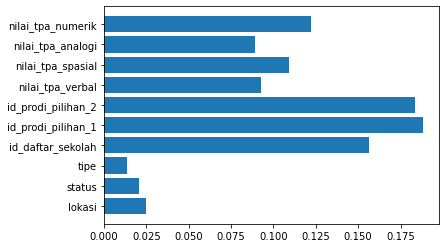

In [59]:
plt.barh(X.columns,rfc.feature_importances_)

In [60]:
from sklearn import model_selection 
from sklearn.model_selection import KFold
skfold = StratifiedKFold(n_splits=10)
results_skfold = model_selection.cross_val_score(rfc, X_train, y_train.values.ravel(), cv=skfold)
print('Validation Score:')
print(results_skfold)

Validation Score:
[0.70967742 0.75806452 0.7704918  0.75409836 0.70491803 0.83606557
 0.91803279 0.83606557 0.78688525 0.78688525]


In [61]:
import pickle
rfc_regular = rfc
pickle.dump(rfc_regular,open("regular_entry_model.sav", 'wb'))

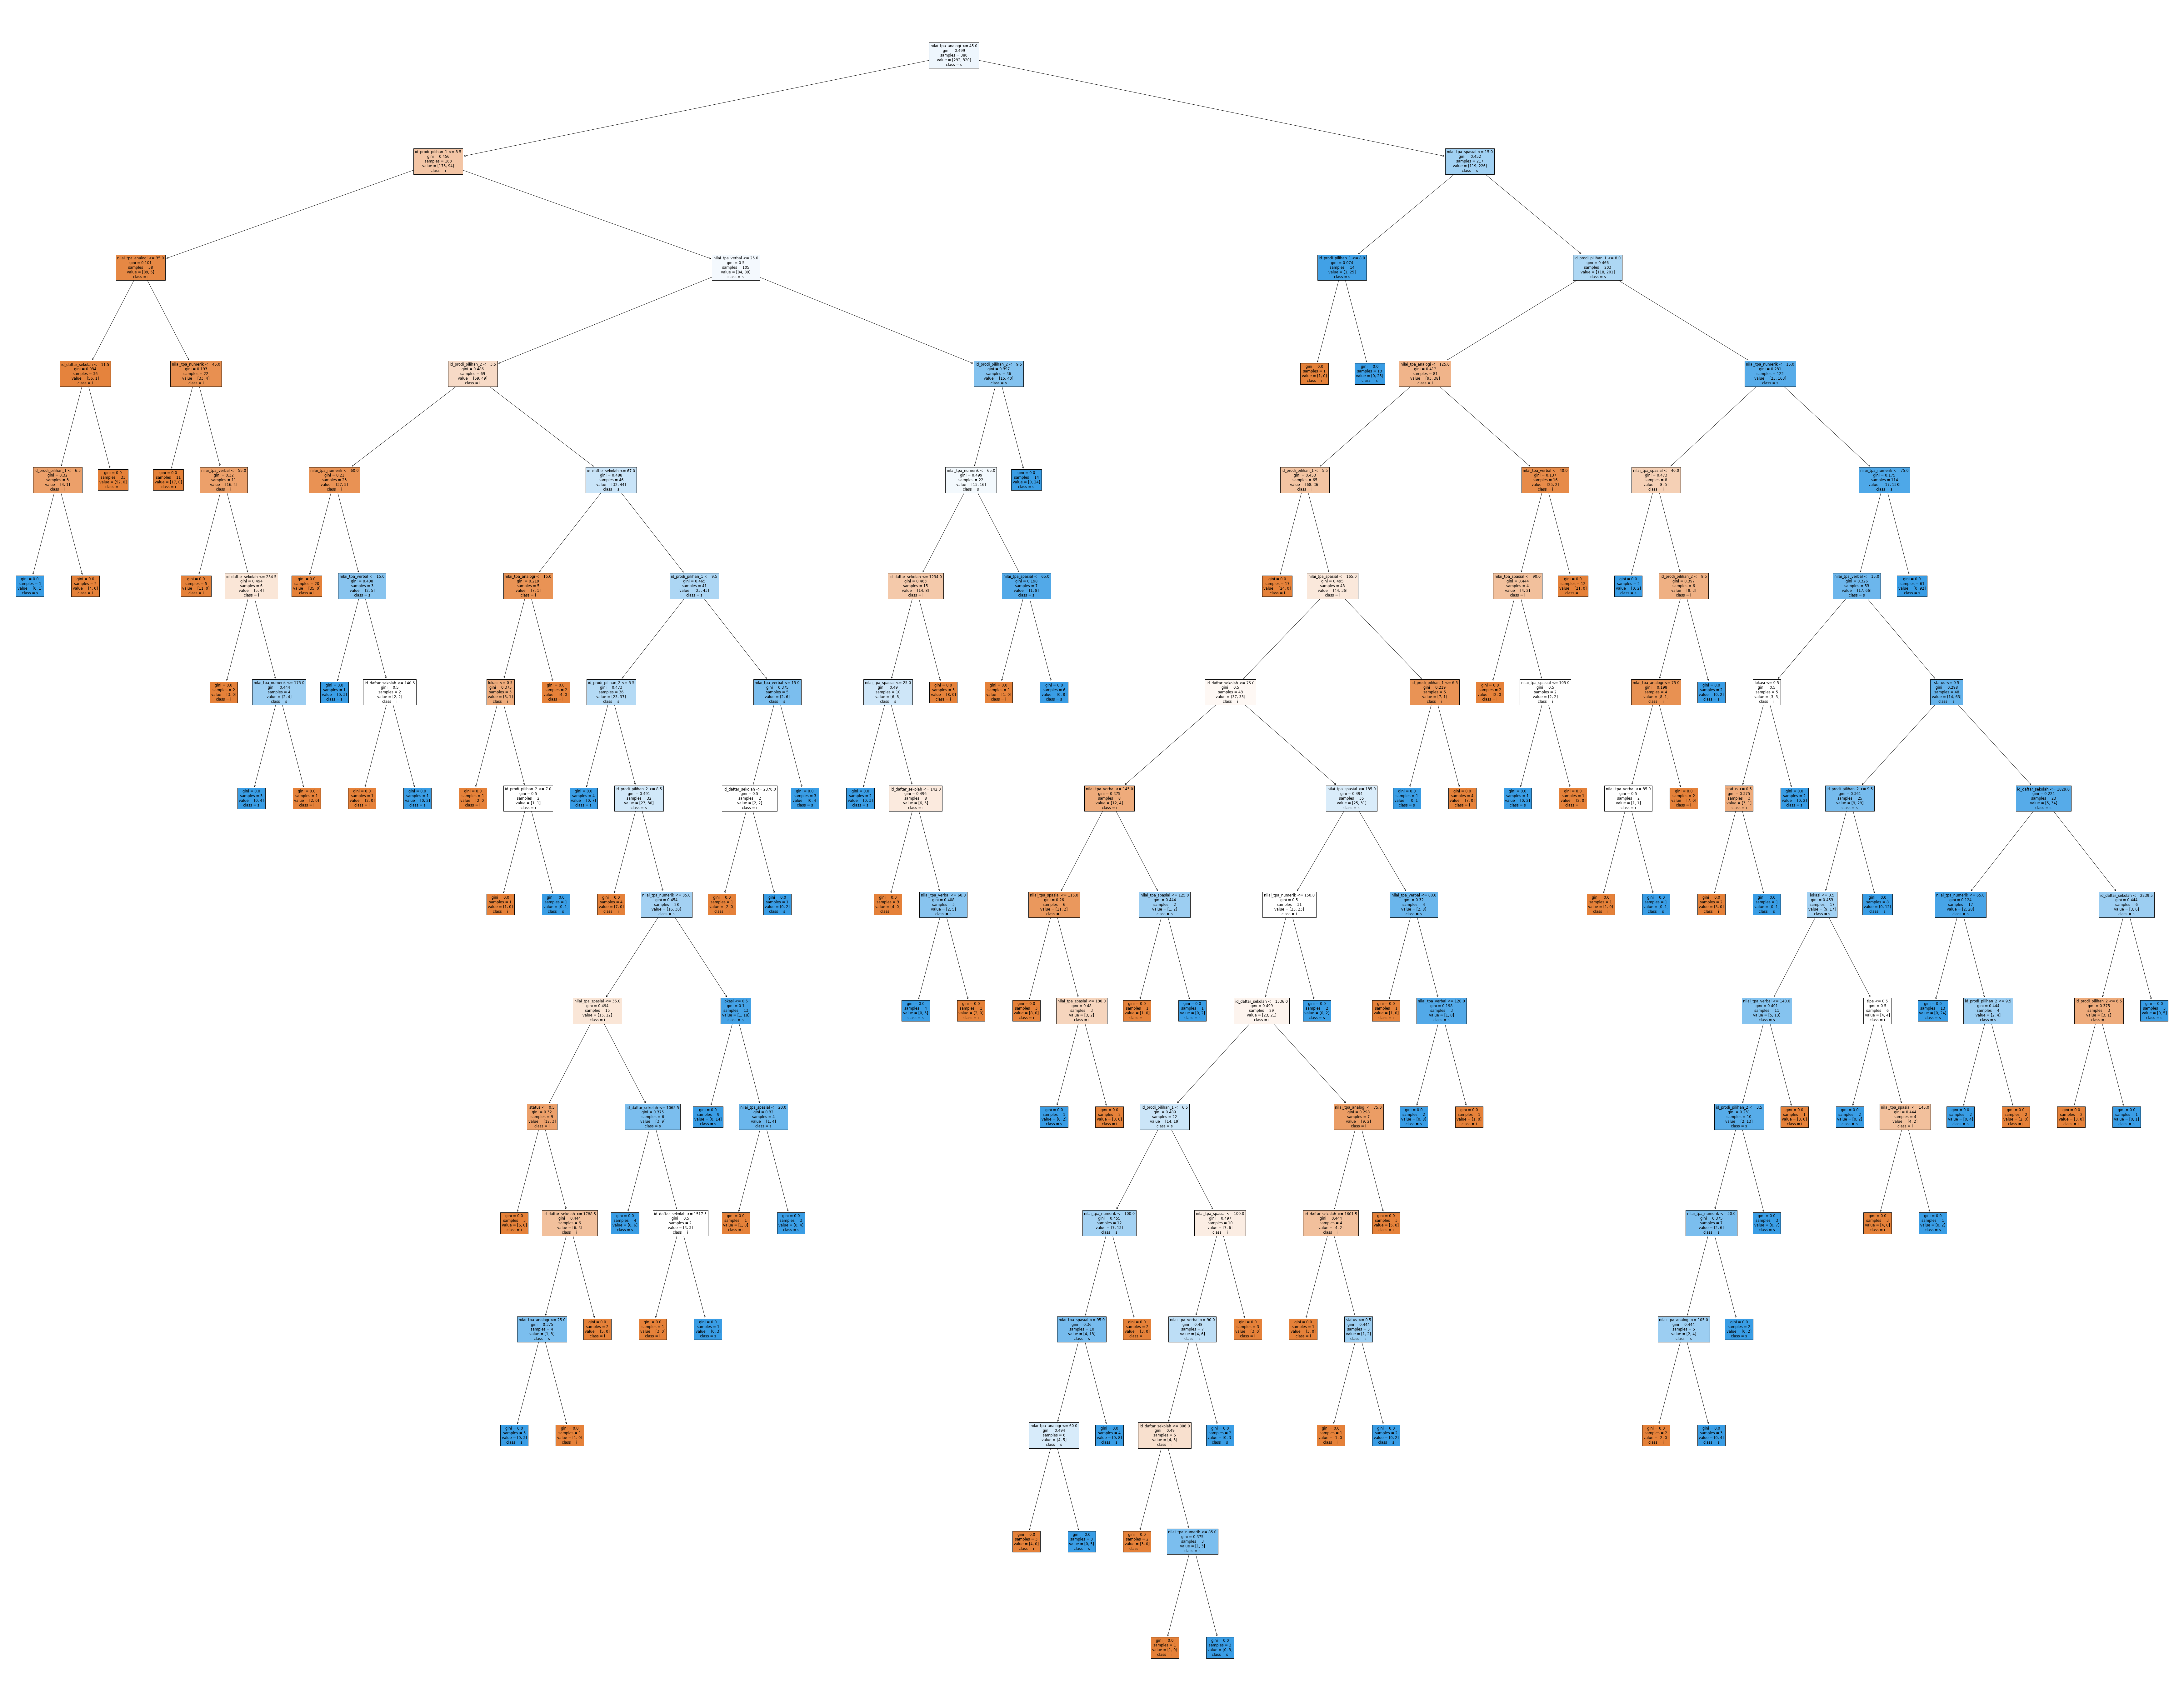

In [17]:
# Visualize them trees in them forests
fn=['lokasi', 'status', 'tipe', 'id_daftar_sekolah', 'id_prodi_pilihan_1',
       'id_prodi_pilihan_2', 'nilai_tpa_verbal', 'nilai_tpa_spasial',
       'nilai_tpa_analogi', 'nilai_tpa_numerik']
cn='is_lolos_seleksi'

fig = plt.figure(figsize=(125,100))
_ = tree.plot_tree(rfc.estimators_[0], 
                   feature_names=fn, 
                   class_names=cn,
                   filled=True)

### default out-of-the-box Decision Tree

Model accuracy score by default: 0.7304
Training-set accuracy score: 1.0000
Training set score: 1.0000
Test set score: 0.7304
              precision    recall  f1-score   support

           0       0.72      0.69      0.70       188
           1       0.74      0.77      0.75       220

    accuracy                           0.73       408
   macro avg       0.73      0.73      0.73       408
weighted avg       0.73      0.73      0.73       408



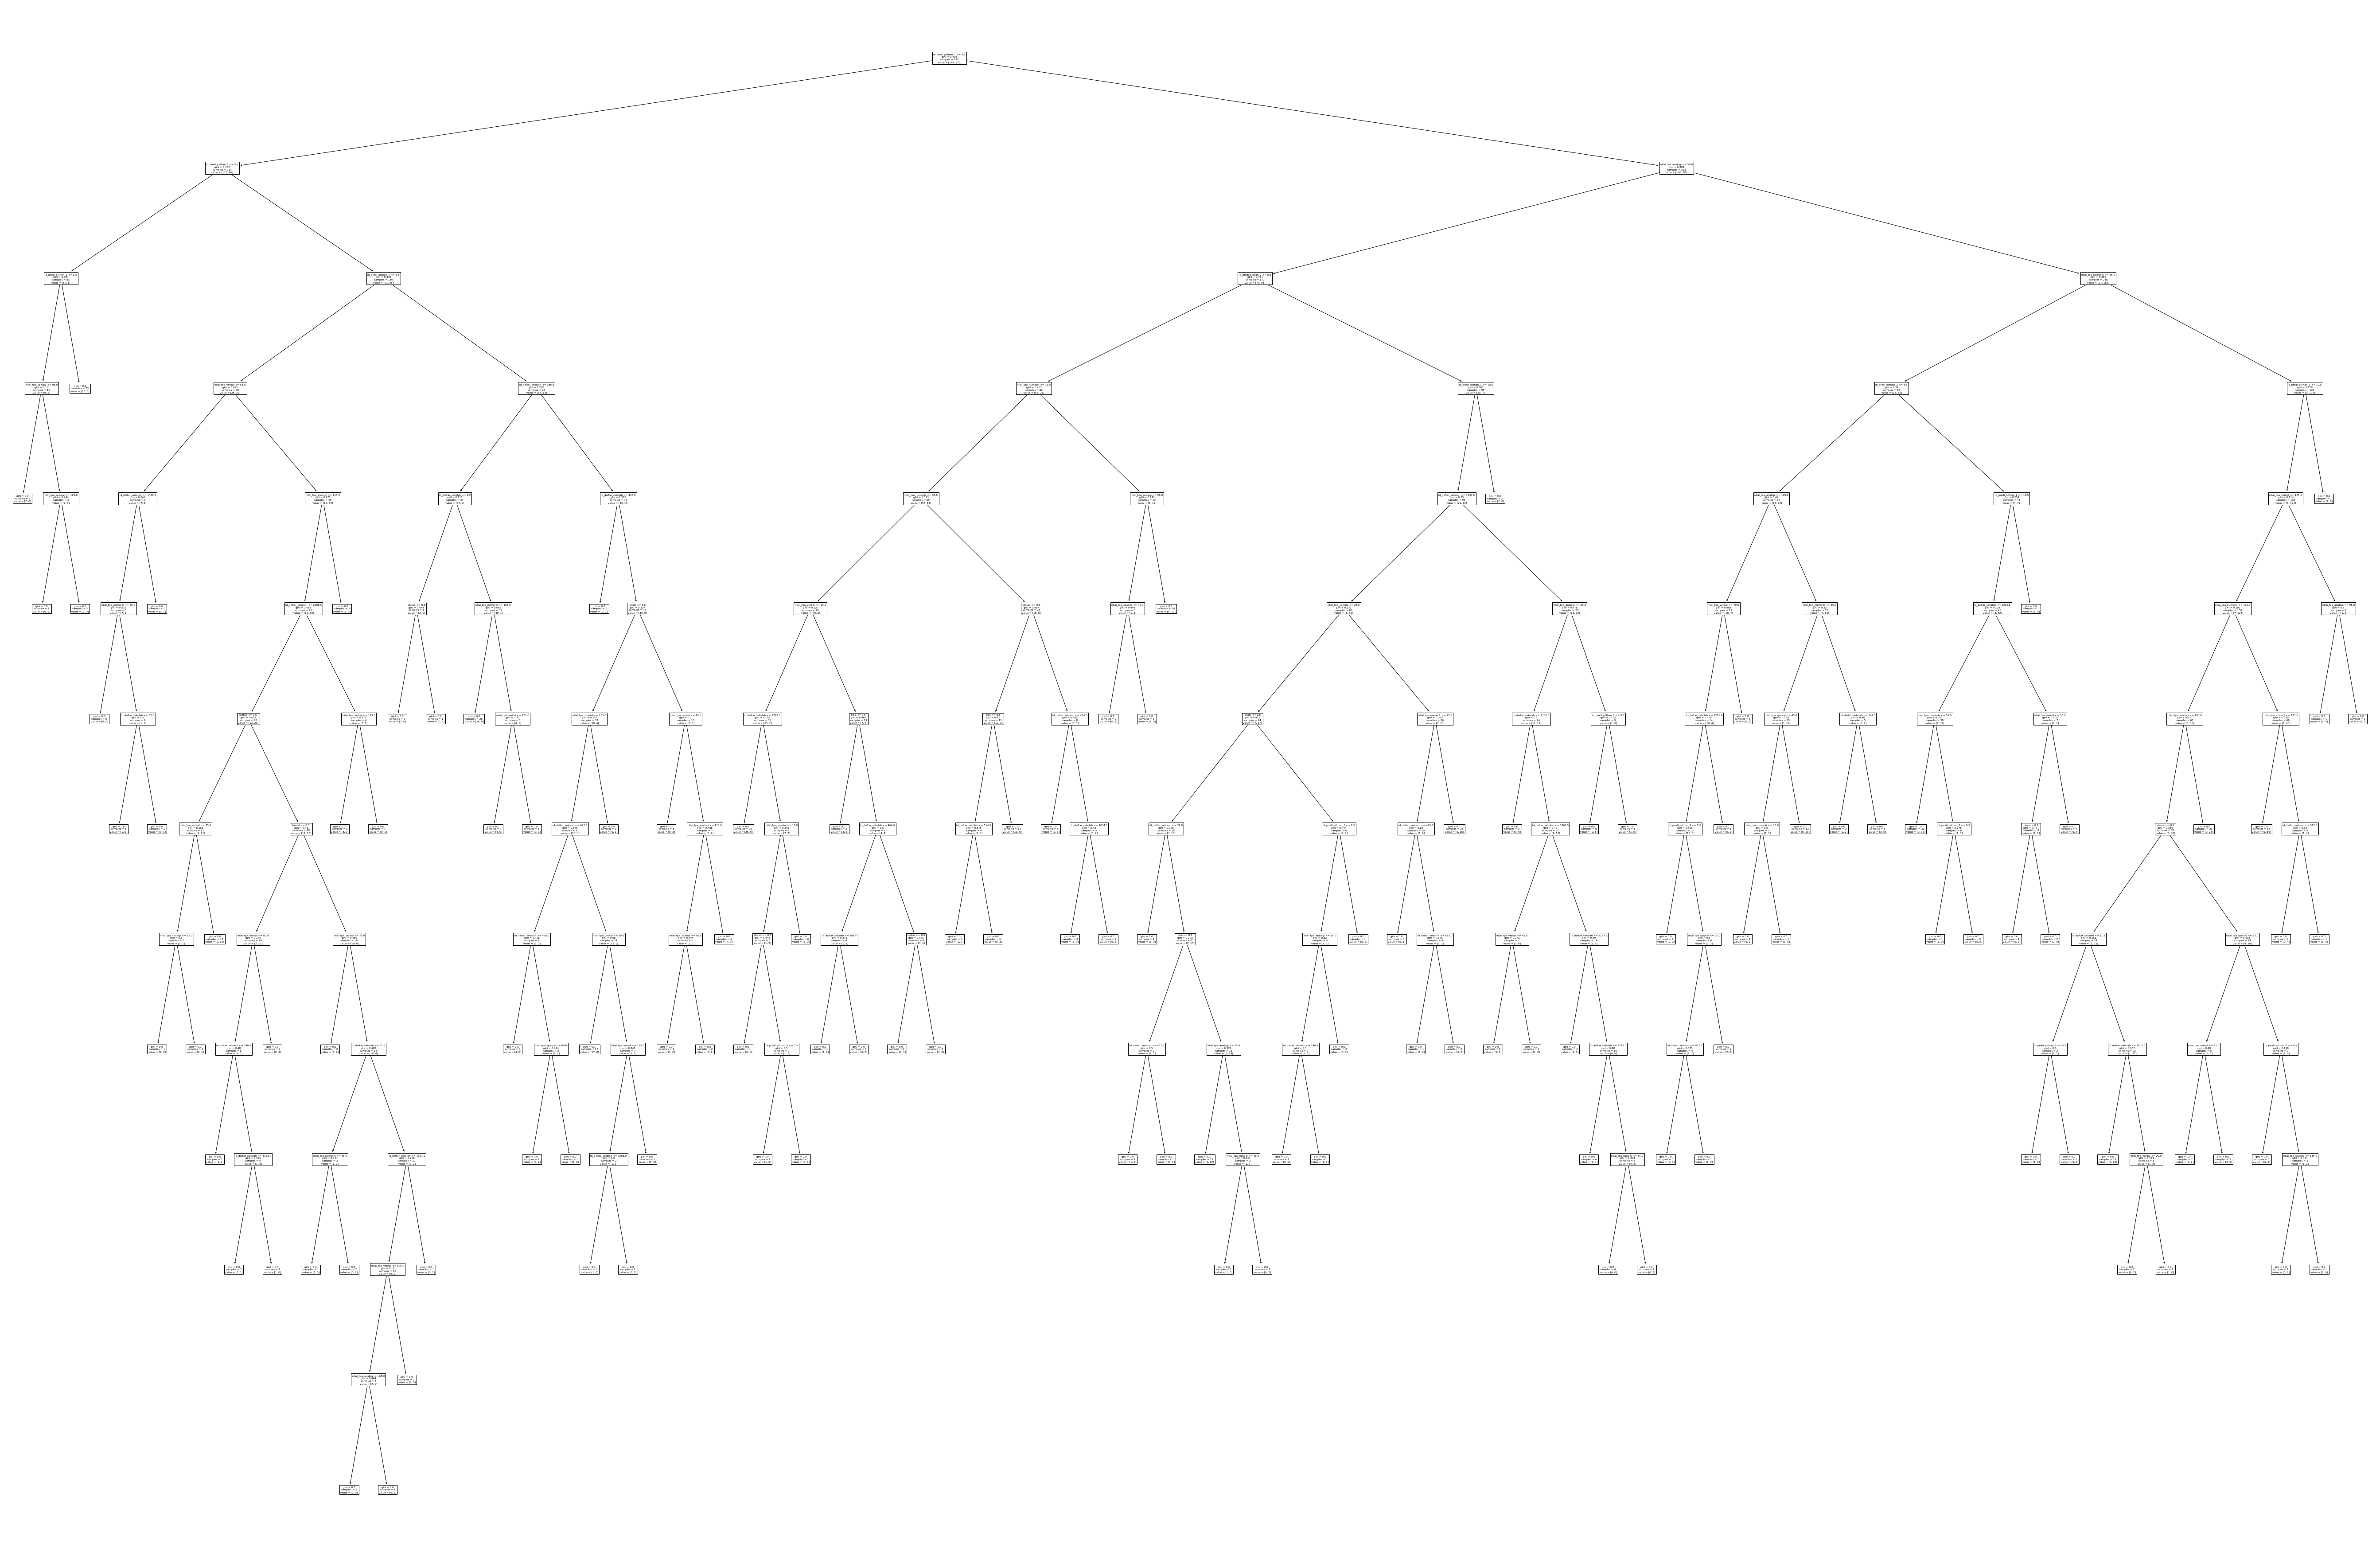

In [62]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# fit the model
clf.fit(X_train, y_train)

# Predict the Test set results with criterion gini index
y_pred = clf.predict(X_test)

# Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score by default: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Compare the train-set and test-set accuracy
y_pred_train = clf.predict(X_train)

y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

# Visualize decision-trees
plt.figure(figsize=(96,64))

tree.plot_tree(clf.fit(X_train, y_train),feature_names=njp.columns) 

# classification report
print(classification_report(y_test, y_pred))

In [63]:
from sklearn import model_selection 
from sklearn.model_selection import KFold
skfold = StratifiedKFold(n_splits=10)
results_skfold = model_selection.cross_val_score(clf, X_train, y_train.values.ravel(), cv=skfold)
print('Validation Score:')
print(results_skfold)

Validation Score:
[0.64516129 0.70967742 0.73770492 0.70491803 0.70491803 0.73770492
 0.81967213 0.72131148 0.60655738 0.72131148]


<BarContainer object of 10 artists>

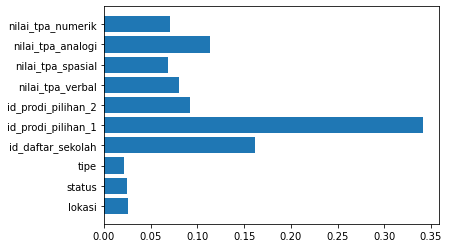

In [64]:
plt.barh(X.columns,clf.feature_importances_)

### with criterion Enthropy 

Model accuracy score with criterion entropy: 0.7059
Training-set accuracy score: 1.0000
Training set score: 1.0000
Test set score: 0.7059
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       188
           1       0.72      0.75      0.73       220

    accuracy                           0.71       408
   macro avg       0.70      0.70      0.70       408
weighted avg       0.71      0.71      0.71       408



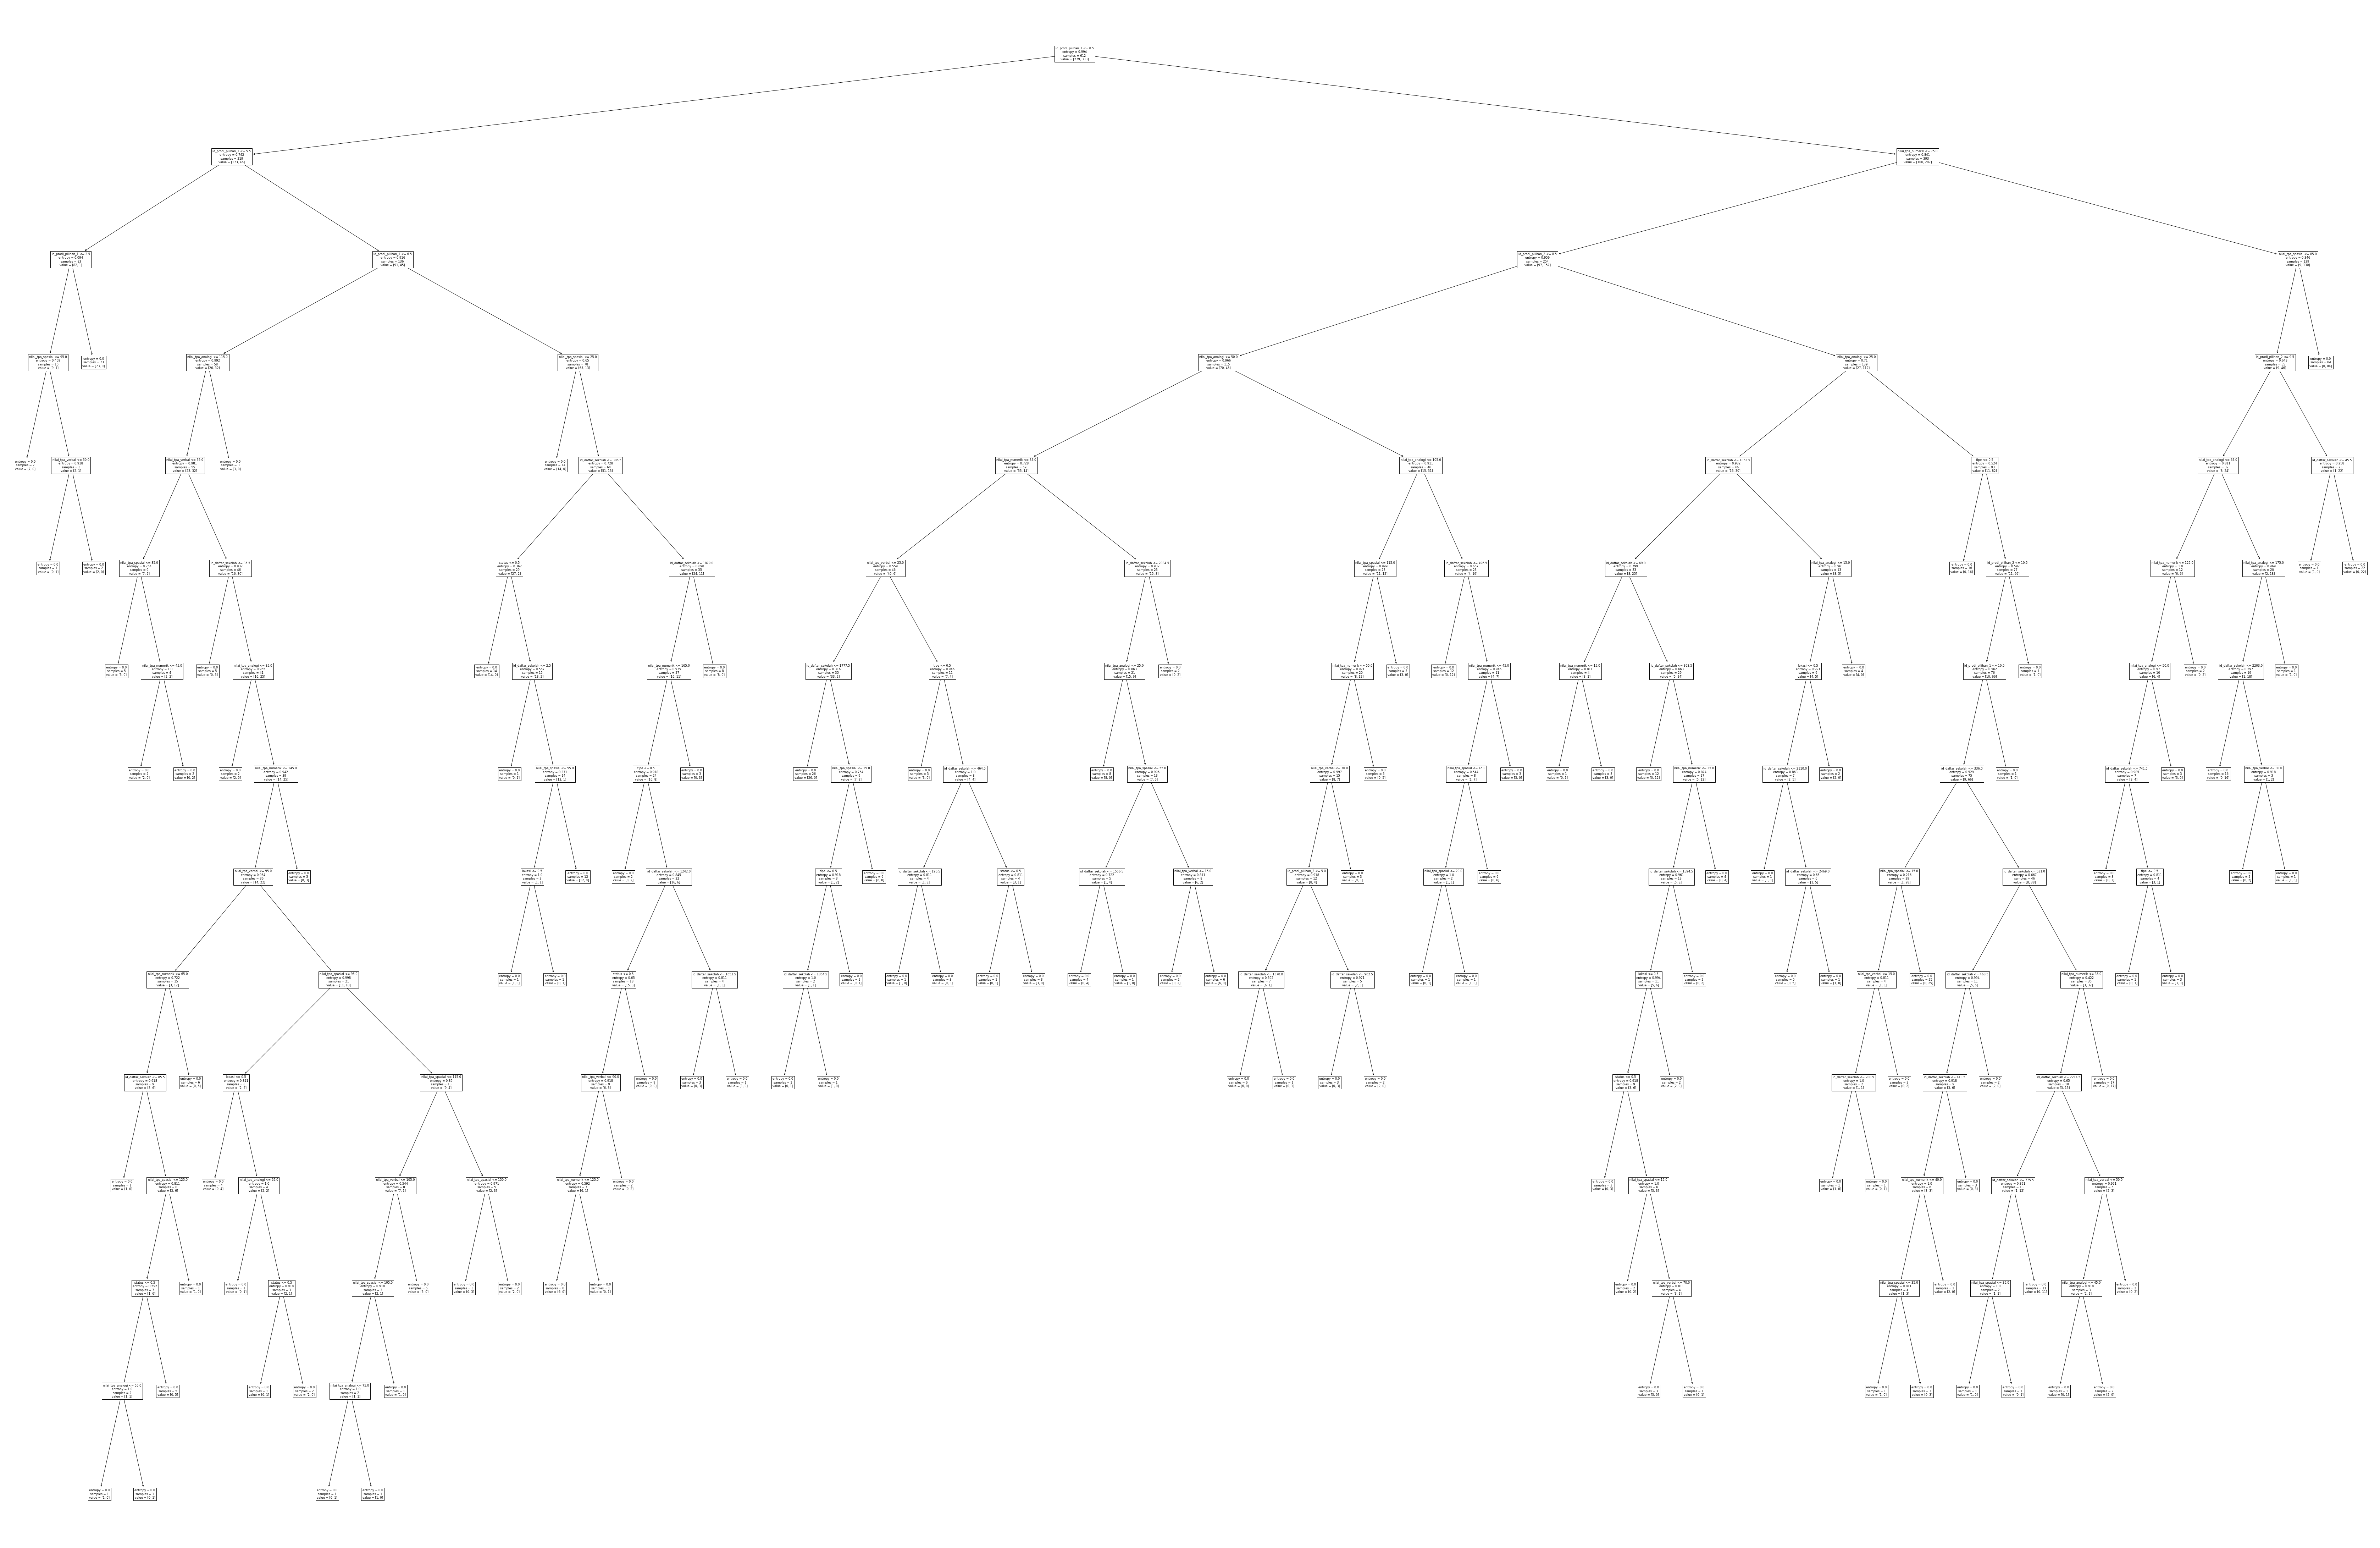

In [40]:
clf_en = DecisionTreeClassifier(criterion='entropy')
clf_en.fit(X_train, y_train)

# Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

# Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

# Compare the train-set and test-set accuracy
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

# Visualize decision-trees
import matplotlib.pyplot as plt
plt.figure(figsize=(120,80))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train),feature_names=njp.columns) 
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

In [41]:
from sklearn import model_selection 
from sklearn.model_selection import KFold
skfold = StratifiedKFold(n_splits=10)
results_skfold = model_selection.cross_val_score(clf_en, X_train, y_train.values.ravel(), cv=skfold)
print('Validation Score:')
print(results_skfold)

Validation Score:
[0.72580645 0.72580645 0.6557377  0.75409836 0.68852459 0.73770492
 0.7704918  0.72131148 0.6557377  0.70491803]


## Training the Regular registrations

## Training the Special registrations

In [44]:
Y = jp[['is_diterima']]
X = jp.drop(['is_diterima'], axis=1)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42)
X_train.shape, X_test.shape

((478, 8), (319, 8))

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=8)

# fit the model
rfc.fit(X_train, y_train.values.ravel())

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with Random Forest Classifier: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Compare the train-set and test-set accuracy
y_pred_train = rfc.predict(X_train)

y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(rfc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rfc.score(X_test, y_test)))

# classification report

print(classification_report(y_test, y_pred))

Model accuracy score with Random Forest Classifier: 0.9248
Training-set accuracy score: 0.9895
Training set score: 0.9895
Test set score: 0.9248
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       194
           1       0.94      0.86      0.90       125

    accuracy                           0.92       319
   macro avg       0.93      0.91      0.92       319
weighted avg       0.93      0.92      0.92       319



<BarContainer object of 8 artists>

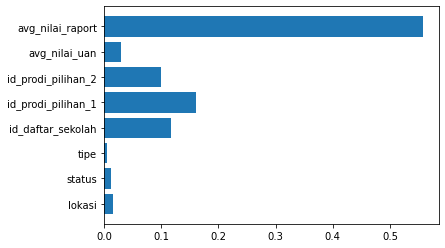

In [50]:
plt.barh(X.columns,rfc.feature_importances_)

In [51]:
from sklearn import model_selection 
from sklearn.model_selection import KFold
skfold = StratifiedKFold(n_splits=10)
results_skfold = model_selection.cross_val_score(rfc, X_train, y_train.values.ravel(), cv=skfold)
print('Validation Score:')
print(results_skfold)

Validation Score:
[0.85416667 0.89583333 0.91666667 0.91666667 0.9375     0.91666667
 0.91666667 0.97916667 0.9787234  0.87234043]


In [52]:
import pickle
rfc_special = rfc
pickle.dump(rfc_special,open("special_entry_model.sav", 'wb'))

Model accuracy score with criterion gini index: 0.9342
Training-set accuracy score: 0.9435
Training set score: 0.9435
Test set score: 0.9342
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       194
           1       0.91      0.92      0.92       125

    accuracy                           0.93       319
   macro avg       0.93      0.93      0.93       319
weighted avg       0.93      0.93      0.93       319



[Text(0.4230769230769231, 0.875, 'avg_nilai_raport <= 72.5\ngini = 0.458\nsamples = 478\nvalue = [308, 170]'),
 Text(0.15384615384615385, 0.625, 'avg_nilai_raport <= 11.0\ngini = 0.039\nsamples = 250\nvalue = [245, 5]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 236\nvalue = [236, 0]'),
 Text(0.23076923076923078, 0.375, 'id_prodi_pilihan_2 <= 9.5\ngini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6923076923076923, 0.625, 'id_prodi_pilihan_1 <= 8.5\ngini = 0.4\nsamples = 228\nvalue = [63, 165]'),
 Text(0.5384615384615384, 0.375, 'avg_nilai_raport <= 89.0\ngini = 0.241\nsamples = 50\nvalue = [43, 7]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.187\nsamples = 48\nvalue = [43, 5]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8461538461538461, 0.375, 'avg_nilai_raport <= 76

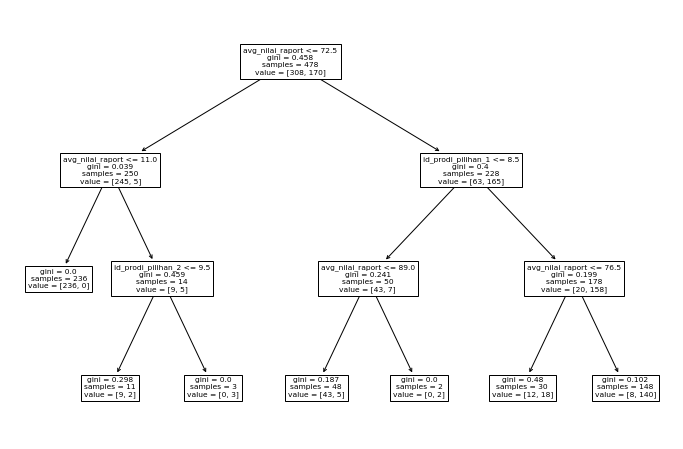

In [48]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

# Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

# Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

# Compare the train-set and test-set accuracy
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))
print(classification_report(y_test, y_pred_gini))
# Visualize decision-trees
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train),feature_names=jp.columns) 

In [54]:
from sklearn import model_selection 
from sklearn.model_selection import KFold
skfold = StratifiedKFold(n_splits=10)
results_skfold = model_selection.cross_val_score(clf_gini, X_train, y_train.values.ravel(), cv=skfold)
print('Validation Score:')
print(results_skfold)

Validation Score:
[0.89583333 0.91666667 0.95833333 0.85416667 0.9375     0.91666667
 0.95833333 0.9375     1.         0.89361702]


<BarContainer object of 8 artists>

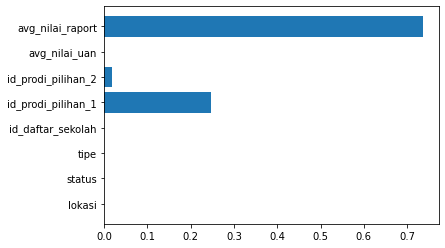

In [55]:
plt.barh(X.columns,clf_gini.feature_importances_)